<a href="https://colab.research.google.com/github/hws2002/MachineLearning_PytorchNScikitLearn/blob/master/chapter6/Chaper6_3_debugging_by_learning_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.3 학습 곡선과 검증 곡선을 사용한 알고리즘 디버깅
학습 곡선을 사용하여 학습 알고리즘이 문제에 과대적합(높은 분산) 되는지 또는 과소적합(높은 편향)되는지 분석하는 방법을 알아보자.  

또한 학습 알고리즘의 보편적인 문제를 다루는 데 도움이 되는 검증 곡선에 대해 알아보자.  


## 6.3.1 학습 곡선을 편향과 분산 문제 분석
주어진 훈련 데이터셋에 비해 모델이 너무 복잡하면, 훈련 데이터에 과대적합되고 처음 본 데이터에 잘 일반화되지 못하는 경향이 있음.  

보통 훈련 샘플을 더 모으면 과대적합을 줄이는데 도움이 되지만, 실전에서는 데이터를 더 모으는 것이 매우 비싸거나 불가능할 때도 많음.  

이때 모델의 훈련 정확도와 검증 정확도를 훈련 데이터셋의 크기 함수로 그래프를 그려 보면 모델에 높은 분산의 문제가 있는지 높은 편향의 문제가 있는지 쉽게 감지할 수 있음.  

이는 더 많은 데이터를 모으는 것이 문제를 해결할 수 있을지 판단이 가능토록 함.  

In [2]:
import pandas as pd
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
    header = None
)
df.columns = [
    'ID',
    'Diagnosis',
    'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
    'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
    'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'
]
X, y = df.iloc[:,2:].values , df.iloc[:,1].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)
print(y)

import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 1)
y_train_bc = np.bincount(y_train)
print(y_train_bc)
print(f'ratio : {y_train_bc[0]/ y_train_bc.sum() :.3f} , {y_train_bc[1] / y_train_bc.sum() :.3f}')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)
from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train_pca = pca.fit_transform(X_train_std)
# X_test_std = pca.transform(X_test_std)

from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(multi_class = 'ovr',
                        #  random_state = 1,
                        #  solver = 'lbfgs')

['B' 'M']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 

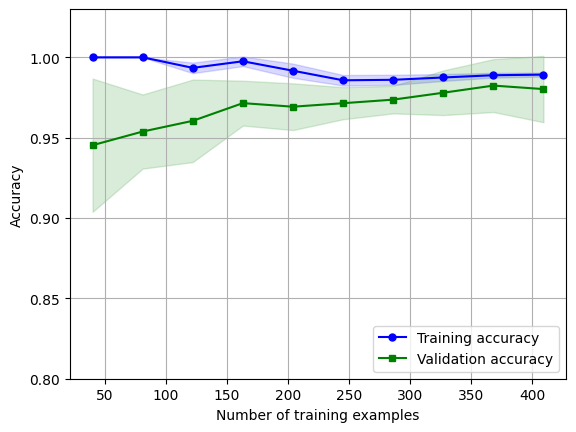

In [8]:
# 사이킷런의 학습 곡선 함수를 사용하여 모델을 평가해 보자
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',
                                           max_iter=10000))
train_sizes, train_scores, test_scores = \
  learning_curve(estimator = pipe_lr,
                 X=X_train,
                 y=y_train,
                 train_sizes = np.linspace(
                     0.1, 1.0, 10),
                 cv = 10,
                 n_jobs = 1)

train_mean = np.mean( train_scores, axis = 1)
train_std = np.std( train_scores, axis = 1)
test_mean = np.mean( test_scores, axis = 1)
test_std = np.std( test_scores, axis = 1)

plt.plot(train_sizes, train_mean,
         marker = 'o', color = 'blue',
         label = 'Training accuracy', markersize = 5)

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean,
         marker = 's', color = 'green',
         label = 'Validation accuracy', markersize = 5)

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.8, 1.03])
plt.show()

## 6.3.2 검증 곡선으로 과대적합과 과소적합 조사
검증 곡선은 과대적합과 과소적합 문제를 해결하여 모델 성능을 높일 수 있는 유용한 도구임.  

검증 곡선은 학습 곡선과 관련이 있지만, 샘플 크기의 함수로 훈련 정확도와 테스트 정확도를 그리는 대신 모델 파라미터 값의 함수로 그림 (예를 들어 로지스틱 회귀에 있는 규제 매개변수 C)

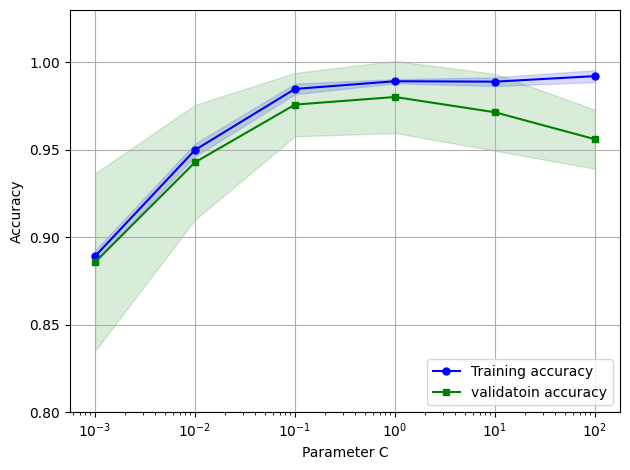

In [12]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator = pipe_lr,
    X = X_train,
    y = y_train,
    param_name = 'logisticregression__C',
    param_range = param_range,
    cv = 10
)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(param_range, train_mean,
         color = 'blue', marker = 'o',
         markersize = 5, label = 'Training accuracy')

plt.fill_between( param_range,
                  train_mean + train_std,
                  train_mean - train_std,
                  alpha = 0.15,  color = 'blue'
)

plt.plot(param_range, test_mean,
         color = 'green', marker = 's',
         markersize = 5, label = 'validatoin accuracy')

plt.fill_between( param_range,
                 test_mean + test_std,
                  test_mean - test_std,
                  alpha = 0.15, color = 'green')
plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.ylim([0.8,1.03])
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

### LearningCurveDisplay 와 ValidationCurveDisplay
사이킷런 1.2 버전에서 learning_curve함수의 반환값을 사용하여 학습 곡선을 손쉽게 그려주는 LearningCurveDisplay 클래스가 추가됨.

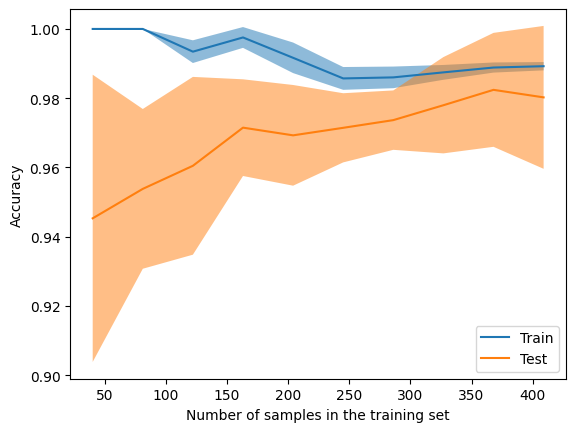

In [16]:
from sklearn.model_selection import LearningCurveDisplay, ValidationCurveDisplay

train_sizes, train_scores, test_scores = \
  learning_curve(estimator = pipe_lr,
                 X=X_train,
                 y=y_train,
                 train_sizes = np.linspace(
                     0.1, 1.0, 10),
                 cv = 10,
                 n_jobs = 1)

display = LearningCurveDisplay(train_sizes = train_sizes,
                               train_scores = train_scores,
                               test_scores = test_scores,
                               score_name = 'Accuracy')
display.plot(score_type = 'both')
plt.legend(loc = 'lower right')
plt.show()